In [1]:
import pandas as pd
import sklearn
import yaml
import joblib
import pytest
from Bio import SeqIO
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)

In [ ]:
from Bio import SeqIO

sequences = []
cluster_ids = []
for record in SeqIO.parse("data/uniref50_sample_2.fasta", "fasta"):
    header = record.description  # e.g., sp|A4GCJ4|RDRP_I36A0

    try:
        family_code = header.split("|")[2].split("_")[0]  # e.g., RDRP from RDRP_I36A0
    except IndexError:
        family_code = "UNKNOWN"
    sequences.append(str(record.seq))
    cluster_ids.append(family_code)

In [4]:
import pandas as pd

data = pd.DataFrame({"cluster_id": cluster_ids, "sequence": sequences})

In [5]:
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")
encoded = []
for seq in data["sequence"]:
    vec = [seq.count(aa) / len(seq) for aa in amino_acids]
    encoded.append(vec)

In [6]:
preprocessed = np.array(encoded)

In [7]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5, random_state=42)
model.fit(preprocessed)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [8]:
predictions = model.predict(preprocessed)

C:\Users\halam\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\halam\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


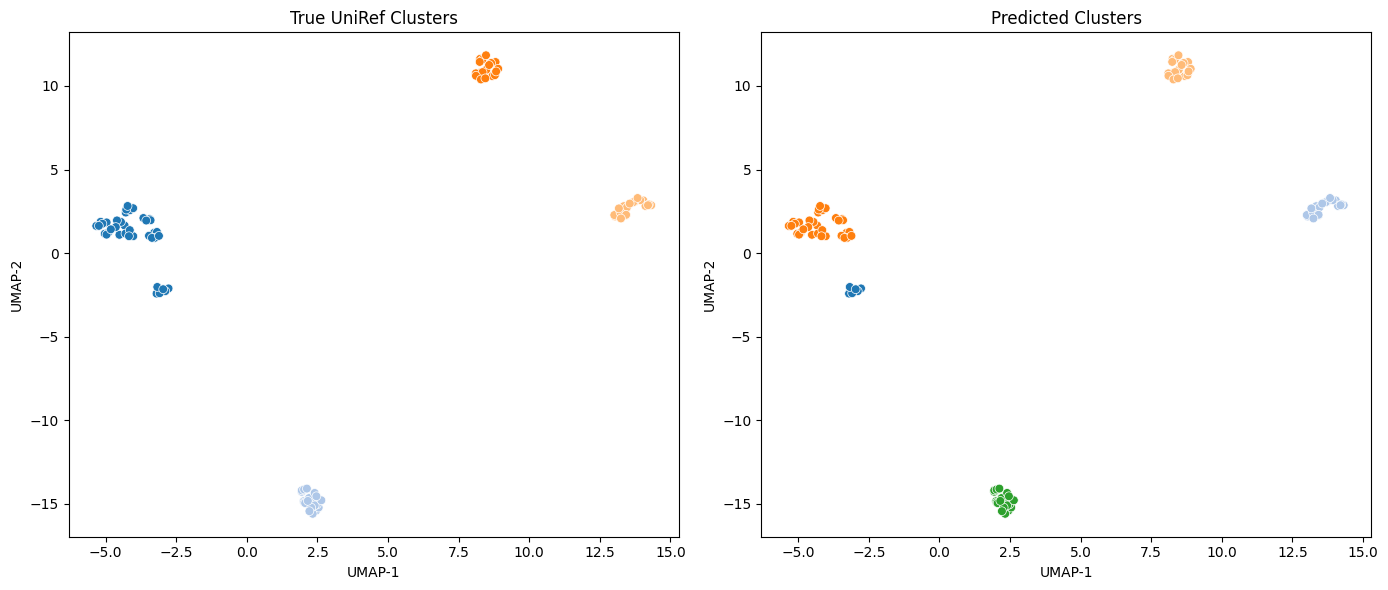

In [9]:
from sklearn.preprocessing import LabelEncoder

reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(preprocessed)
le_true = LabelEncoder()
y_true = le_true.fit_transform(data['cluster_id'])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, labels, title in zip(axes, [y_true, predictions], ["True UniRef Clusters", "Predicted Clusters"]):
    scatter = sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette='tab20', s=40, ax=ax, legend=False)
    ax.set_title(title)
    ax.set_xlabel("UMAP-1")
    ax.set_ylabel("UMAP-2")
plt.tight_layout()
plt.show()